# Definición del proyecto

**Prevención de infartos en asegurados.**<br>
Contexto: En los enfermos con síndrome coronario agudo atendidos en hospitales, la predicción de muerte y/o infarto al miocardio no fatal en los 6 meses puede realizarse con variables sencillas.

Un buen diseño de modelo de Machine Learning puede ayudar al paciente con alto riesgo de sufrir un infarto a prevenir tal suceso. Desde un punto de vista empresarial de una compañía de seguros es importante, ya que previene altos gastos como pueden ser costos en cuidados intensivos y pago de prima por sufrimiento de infarto, entre otros.

Para lograr este objetivo se han revisado 4 años de otorgación histórica de salud de los clientes asegurados.

## 0. Objetivo
Desarrollar un programa específico para prevenir posibles infartos.

###Notas Adicionales
El conjunto de datos incluye información sobre:
<ol><li>
Clientes que tuvieron un ataque cardiaco - variable dependiente - (la columna se llama Ataque_cardiaco).<li>
Si el cliente tiene problemas de hipertensión o cardiacos.<li>
Si el cliente es o ha sido fumador.<li>
Datos fisiológicos que se refieren al nivel de glucosa y al IMC.<li>
Información demográfica sobre los clientes: género, edad, estado civil, tipo de trabajo y zona de residencia.</ol>

# Desarrollo del proyecto

## 1. Importación de librerías

NOTA: Se importan a partir de este momento TODAS las librerías a emplear en el proyecto, aunque se vuelve a llamar a las librerías especializadas en donde corresponde con fines didácticos (para tener presente en qué paso se utilizan).

In [143]:
# Importación de librerías
import pandas as pd                                    # Manipulación de datos

import numpy as np                                     # Procesamiento de datos

import matplotlib                                      # Visualización de datos
matplotlib.use('Agg')
import matplotlib.pyplot as plt                        # Visualización de datos

import seaborn as sns                                  # Visualización de datos

from sklearn.preprocessing import LabelEncoder         # Importación de LabelEncoder
from sklearn.preprocessing import MinMaxScaler         # Reescalamiento
from sklearn.preprocessing import Normalizer           # Normalización
from sklearn.preprocessing import StandardScaler       # Estandarización estándar
from sklearn.preprocessing import RobustScaler         # Estandarización robusta
from sklearn.feature_selection import SelectKBest      # Selección de variables
import sklearn.model_selection as model_selection      # Separación Train/ Test
from sklearn.tree import DecisionTreeClassifier        # Árbol de decisión
from sklearn.metrics import accuracy_score, log_loss   # Precisión y cobertura
from sklearn.metrics import confusion_matrix           # Matriz de confusión
from sklearn.metrics import classification_report      # Reporte de clasificación F1
from sklearn.ensemble import RandomForestClassifier    # Random forest

import missingno as msno                               # Visualización de datos

sns.set(style='darkgrid')                              # Comando para el estilo de los gráficos
%matplotlib inline

## 2. Carga inicial de datos






In [144]:
# Carga de Dataset
cora = pd.read_csv('DS_train_enf_corazon.csv',sep=";")

## 3. Diccionario de datos

<table>
  <tr>
    <th>Nombre de Campo</th>
    <th>Descripción</th>
    <th>Tipo de Variable</th>
    <th>Tipo de Dato</th>

  </tr>
  <tr>
    <td>ID</td>
    <td>Identificador del paciente</td>
    <td>string</td>
    <td></td>
  </tr>
  <tr>
    <td>Genero</td>
    <td>Si el cliente es hombre o mujer</td>
    <td>Categórico Nominal</td>
    <td>(Hombre, Mujer)</td>
  </tr>
  <tr>
    <td>Edad</td>
    <td>Edad del asegurado</td>
    <td>Discreto</td>
    <td></td>
  </tr>
  <tr>
    <td>Flag_hipertension</td>
    <td>Si el cliente padece de hipertensión o no</td>
    <td>Categórico nominal, Booleano</td>
    <td>(0, 1)</td>
  </tr>
  <tr>
    <td>Flag_problem_cardiaco</td>
    <td>Si el cliente padece de problemas cardiacos</td>
    <td>Categórico nominal, Booleano</td>
    <td>(0, 1)</td>
  </tr>
  <tr>
    <td>Estados_civil</td>
    <td>Si el asegurado está casado o no</td>
    <td>Categórico nominal, Booleano</td>
    <td>(Sí, No)</td>
  </tr>
  <tr>
    <td>Tipo_trabajo</td>
    <td>Actividad económica del cliente</td>
    <td>Categórico nominal</td>
    <td>(Cuidar niños, empresa privada, nunca trabajo, emprendedor, en gobierno, etc.)</td>
  </tr>
  <tr>
    <td>Zona_residencia</td>
    <td>Si el asegurado vive en zona rural o urbana</td>
    <td>Categórico nominal</td>
    <td>(Rural, Urbana)</td>
  </tr>
  <tr>
    <td>Promedio_nivel_glucosa</td>
    <td>Promedio de nivel de glucosa en la sangre del cliente</td>
    <td>Discreto</td>
    <td></td>
  </tr>
  <tr>
    <td>IMC</td>
    <td>Índice de Masa Corporal del asegurado</td>
    <td>Discreto</td>
    <td></td>
  </tr>
  <tr>
    <td>Flag_fumador</td>
    <td>Si el cliente es o ha sido fumador</td>
    <td>Categórico nominal</td>
    <td>(Nunca fuma, antes fumaba, fumador)</td>
  </tr>
  <tr>
    <td>Ataque_cardiaco</td>
    <td>Si el cliente sufrió de ataque cardiaco</td>
    <td>Categórico nominal, Booleano</td>
    <td>(0, 1)</td>
  </tr>
</table>

##4. Análisis inicial de los datos

In [145]:
# Dimensión del Dataset
cora.shape

(43400, 12)

**Hallazgo:**

La base de datos de Clientes con Enfermedades del Corazón cuenta con un total de 12 columnas y 43400 registros.

In [146]:
# Columnas disponibles
cora.columns

Index(['ID', 'Genero', 'Edad', 'Flag_hipertension', 'Flag_problem_cardiaco',
       'Estados_civil', 'Tipo_trabajo', 'Zona_residencia',
       'Promedio_nivel_glucosa', 'IMC', 'Flag_fumador', 'Ataque_cardiaco'],
      dtype='object')

In [147]:
# Tipos de datos disponibles
cora.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      43400 non-null  int64  
 1   Genero                  43400 non-null  object 
 2   Edad                    43400 non-null  float64
 3   Flag_hipertension       43400 non-null  int64  
 4   Flag_problem_cardiaco   43400 non-null  int64  
 5   Estados_civil           43400 non-null  object 
 6   Tipo_trabajo            43400 non-null  object 
 7   Zona_residencia         43400 non-null  object 
 8   Promedio_nivel_glucosa  43400 non-null  float64
 9   IMC                     41938 non-null  float64
 10  Flag_fumador            30108 non-null  object 
 11  Ataque_cardiaco         43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [148]:
cora.isnull().sum()

,0
ID,0
Genero,0
Edad,0
Flag_hipertension,0
Flag_problem_cardiaco,0
Estados_civil,0
Tipo_trabajo,0
Zona_residencia,0
Promedio_nivel_glucosa,0
IMC,1462


<Axes: >

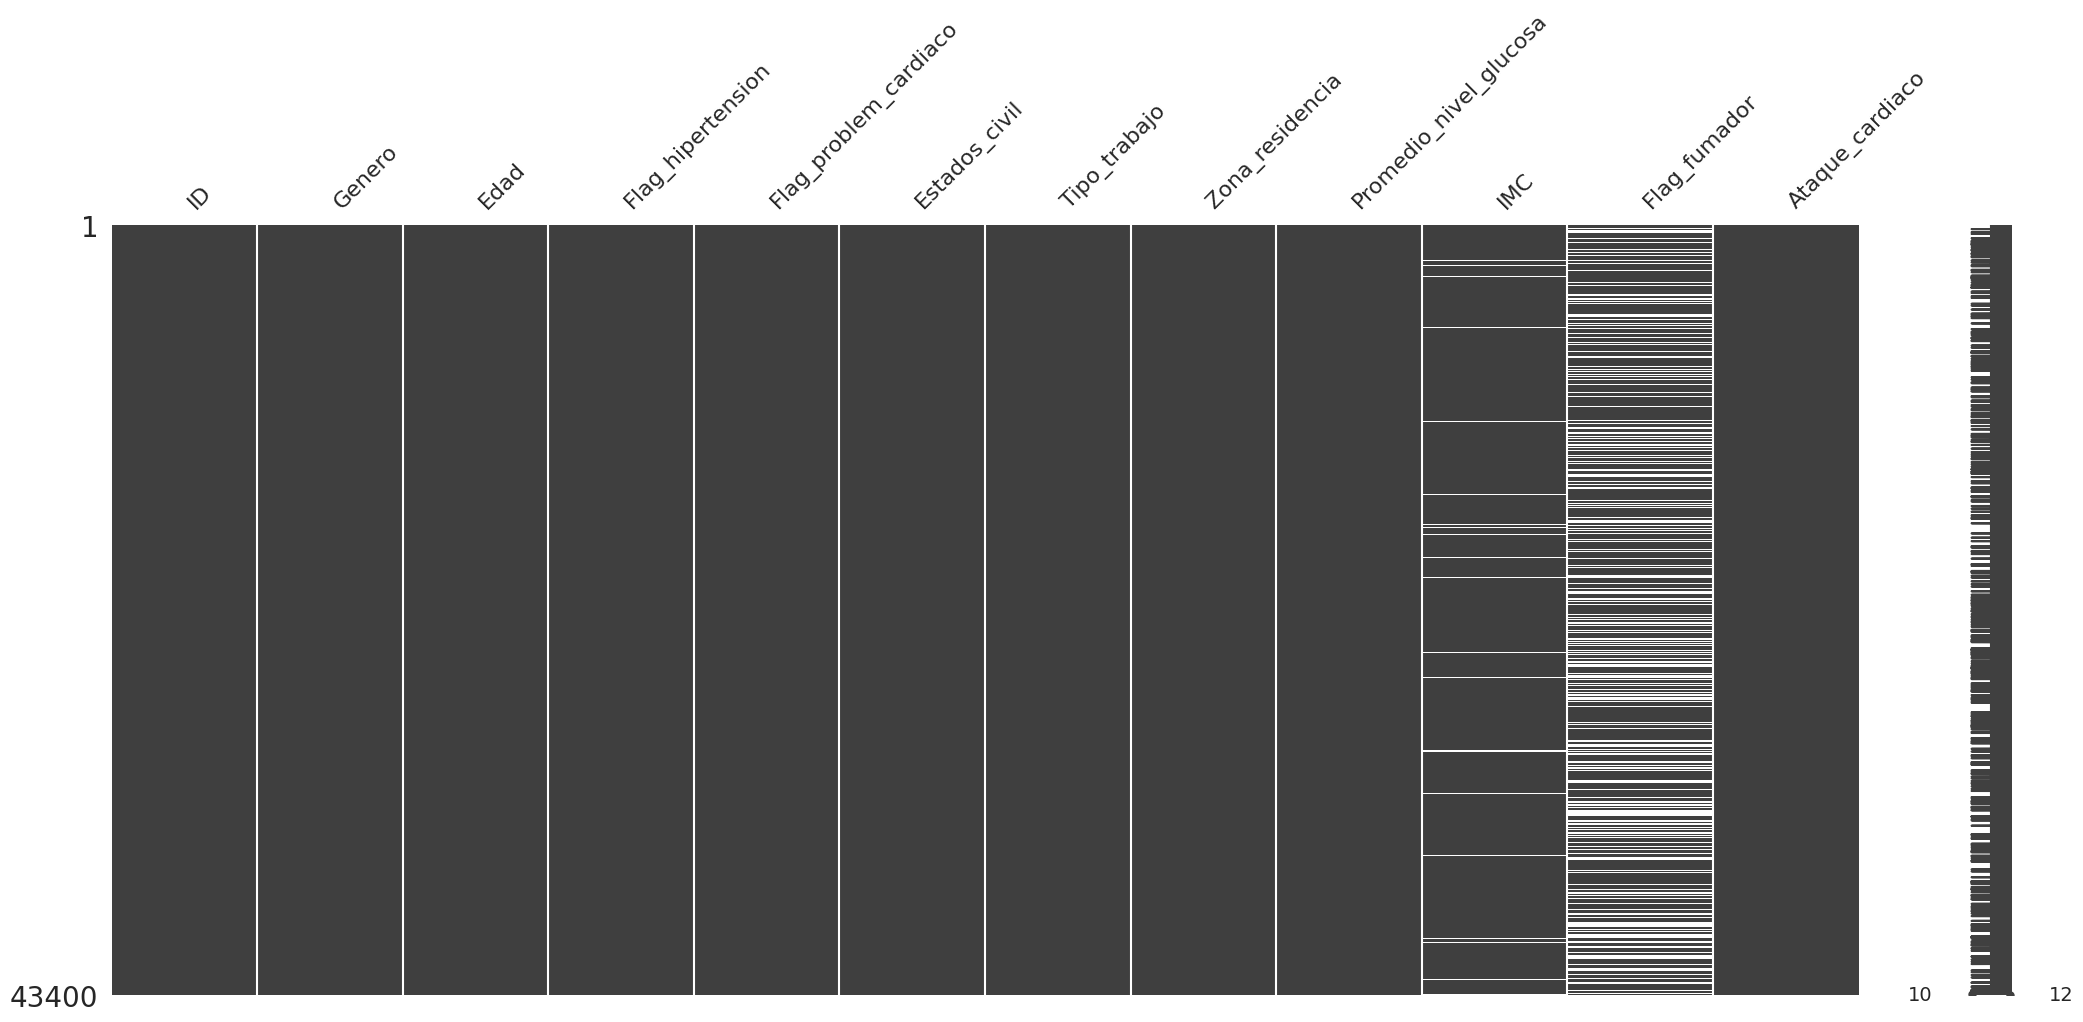

In [149]:
# Creación de gráfico, donde las líneas horizontales representan la fila en la cual se encuentran los valores nulos y cómo están distribuidos.
msno.matrix(cora)

In [150]:
# Contabilización de ceros en cada una de las columnas del DataFrame.
ceros = (cora == 0).sum()

print("Número de ceros por columna:")
print(ceros)

Número de ceros por columna:
ID                            0
Genero                        0
Edad                          0
Flag_hipertension         39339
Flag_problem_cardiaco     41338
Estados_civil                 0
Tipo_trabajo                  0
Zona_residencia               0
Promedio_nivel_glucosa        0
IMC                           0
Flag_fumador                  0
Ataque_cardiaco           42617
dtype: int64


**Hallazgo:**

*   De las 12 variables, 5 son de texto o categóricas (object) y 7 son numéricas (4 enteras y 3 continuas).
*   De las 12 variables, 2 cuentan con valores nulos (IMC: 1,462 de 43,400 registros - ~3.37% -) (Flag_fumador: 13,292 de 43,400 registros - ~30.86%).
*   De las 12 variables, sólo hay ceros ingresados en las variables categóricas booleanas, lo que quiere decir que en el resto de ellas no se cargaron ceros para sustituir alguna otra información, lo cual podría generar desviaciones en la información al igual que los valores nulos.

In [151]:
# Visualizar los primeros 5 registros.
cora.head()

,ID,Genero,Edad,Flag_hipertension,Flag_problem_cardiaco,Estados_civil,Tipo_trabajo,Zona_residencia,Promedio_nivel_glucosa,IMC,Flag_fumador,Ataque_cardiaco
0,30669,Hombre,3.0,0,0,No,cuidar_ninos,Rural,95.12,18.0,NaN,0
1,30468,Hombre,58.0,1,0,Si,Empresa_privada,Urbano,87.96,39.2,Nunca_fuma,0
2,16523,Mujer,8.0,0,0,No,Empresa_privada,Urbano,110.89,17.6,NaN,0
3,56543,Mujer,70.0,0,0,Si,Empresa_privada,Rural,69.04,35.9,antes_fumaba,0
4,46136,Hombre,14.0,0,0,No,Nunca_trabajo,Rural,161.28,19.1,NaN,0


In [152]:
# Visualizar los últimos 5 registros.
cora.tail()

,ID,Genero,Edad,Flag_hipertension,Flag_problem_cardiaco,Estados_civil,Tipo_trabajo,Zona_residencia,Promedio_nivel_glucosa,IMC,Flag_fumador,Ataque_cardiaco
43395,56196,Mujer,10.0,0,0,No,cuidar_ninos,Urbano,58.64,20.4,Nunca_fuma,0
43396,5450,Mujer,56.0,0,0,Si,En_gobierno,Urbano,213.61,55.4,antes_fumaba,0
43397,28375,Mujer,82.0,1,0,Si,Empresa_privada,Urbano,91.94,28.9,antes_fumaba,0
43398,27973,Hombre,40.0,0,0,Si,Empresa_privada,Urbano,99.16,33.2,Nunca_fuma,0
43399,36271,Mujer,82.0,0,0,Si,Empresa_privada,Urbano,79.48,20.6,Nunca_fuma,0


Calcular la cantidad de asegurados que sufrieron de un infarto (Ataque_cardiaco).

Ataque_cardiaco
0    42617
1      783
Name: count, dtype: int64


<Axes: xlabel='Ataque_cardiaco'>

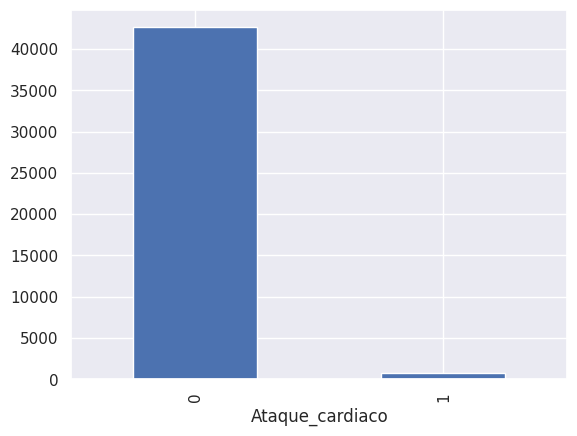

In [153]:
# Calcular la cantidad de asegurados que sufrieron de un infarto (Ataque_cardiaco) y los que no.
cora_count = cora["Ataque_cardiaco"].value_counts()
print(cora_count)
# Visualizar la cantidad de clientes que sufrieron de un infarto (Ataque_cardiaco) y los que no.
cora["Ataque_cardiaco"].value_counts().plot(kind="bar")

In [154]:
783/43400

0.01804147465437788

**Hallazgo:**

El 1.8% de los clientes ha sufrido de un ataque cardiaco. Se sugiere que el tipo de dato de la variable target se mantenga en numérico.

## 5. Análisis estadístico de los datos.

### *5.1.* Análisis de variables cuantitativas.

#### *5.1.1.* Análisis univariado.

El objeto del análisis univariado es poder describir a la variable de manera interna, es decir, conocer su comportamiento y distribución.

In [155]:
# Resumen estadístico de las variables numéricas.
cora.describe()

,ID,Edad,Flag_hipertension,Flag_problem_cardiaco,Promedio_nivel_glucosa,IMC,Ataque_cardiaco
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


**Hallazgos:**

* Las variables "Flag_hipertension" y "Flag_problem_cardiaco" no tienen interpretación estadística ya que son variables booleanas.
* La variable "Edad" tiene un promedio de 42.2 años, cercano a la mediana de 44 años. Además, la desviación estándar (22.52) es menor que la mediana por lo que no deberían existir muchos valores dispersos.
* La variable "Promedio_nivel_glucosa" presenta una media de 104.48, situándose más alta que la mediana (91.58) y ligeramente más cercana al porcentaje del tercer cuadril (112.07). Sin embargo, la desviación estándar (43.11) es menor que el promedio, por lo que no deberían existir valores atípicos extremos.
* La variable "IMC" tiene un promedio de 28.6, cercano a la mediana que es de 27.7. La desviación estándar, que es 7.77, es menor al promedio, por lo que no deberían presentarse valores dispersos en esta columna.

A continuación se elaborará el Diagrama de Caja para obtener la distribución de cada variable:

Para el cálculo del valor máximo y mínimo se realiza lo siguiente:

Valor máx: Q3 + 1.5*RI

Valor mín: Q1 - 1.5*RI

donde RI es el rango intercuartil que es la diferencia de Q3 - Q1.

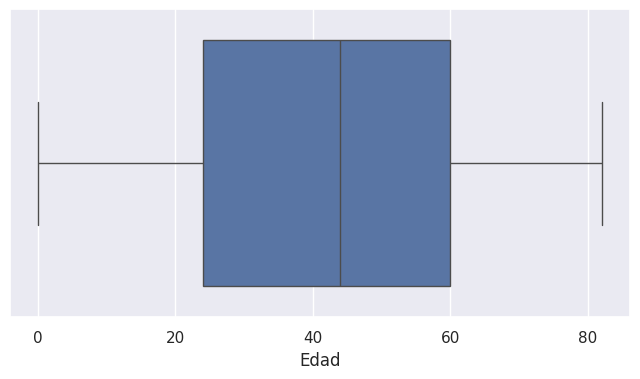

In [156]:
# Diagrama de caja univariado para la variable "Edad".
plt.figure(figsize=(8,4))
sns.boxplot(data=cora, x = "Edad")
plt.show()

**Hallazgo:**

En el diagrama de caja no se observan valores fuera de los extremos, por lo tanto se concluye que no existen valores atípicos.

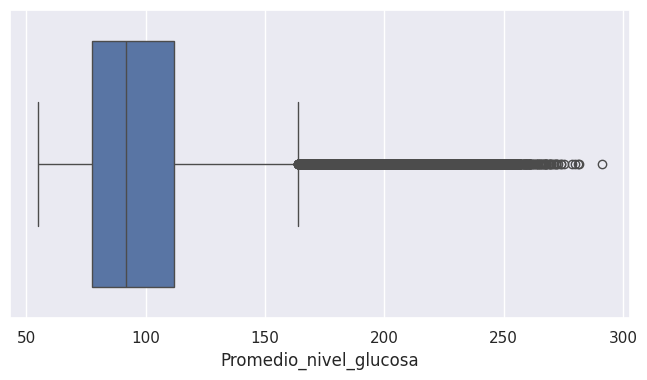

In [157]:
# Diagrama de caja univariado para la variable "Promedio_nivel_glucosa".
plt.figure(figsize=(8,4))
sns.boxplot(data=cora, x = "Promedio_nivel_glucosa")
plt.show()

**Hallazgo:**

En el diagrama de caja se puede observar que existen valores atípicos fuera de los extremos.

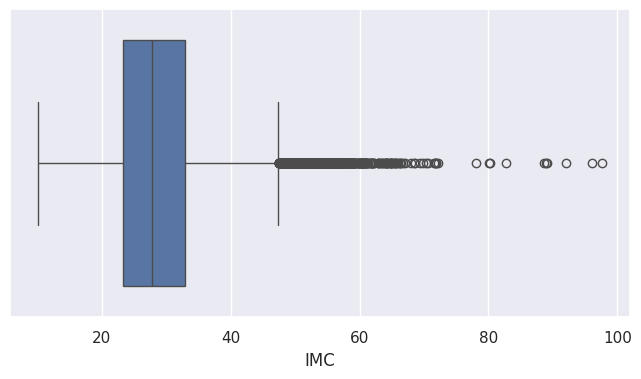

In [158]:
# Diagrama de caja univariado para la variable "IMC".
plt.figure(figsize=(8,4))
sns.boxplot(data=cora, x = "IMC")
plt.show()

**Hallazgo:**

En el diagrama de caja, se puede observar que existen valores atípicos fuera de los extremos.

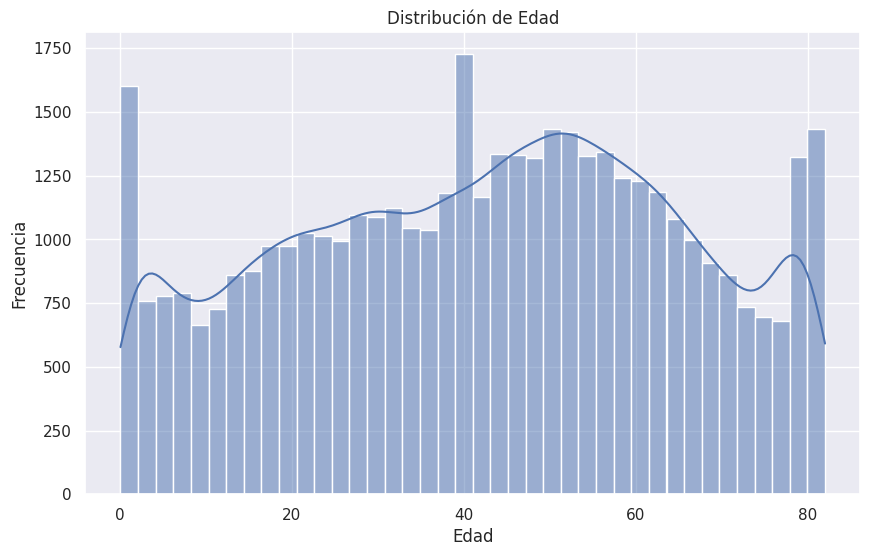

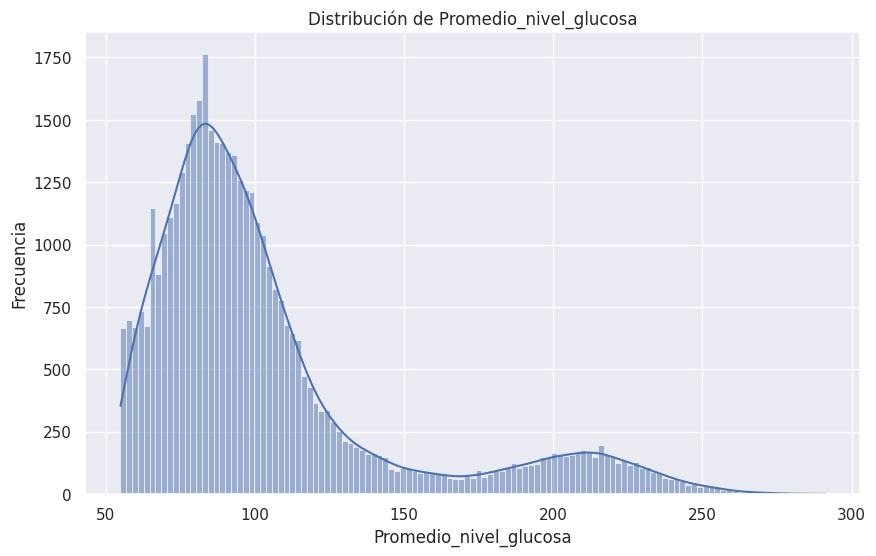

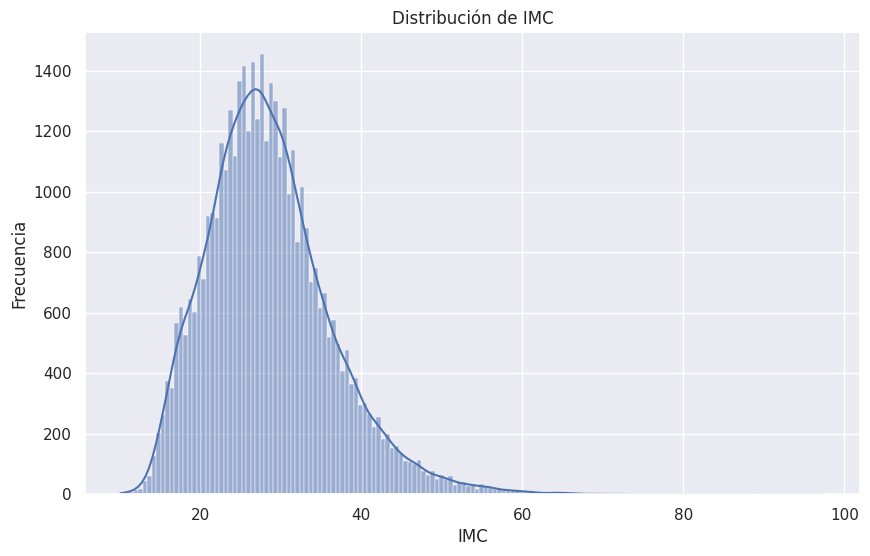

In [159]:
columns_to_include = ['Edad', 'Promedio_nivel_glucosa', 'IMC']
for var in columns_to_include:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=cora, x=var, kde=True)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

#### *5.1.2.* Análisis bivariado

<Axes: >

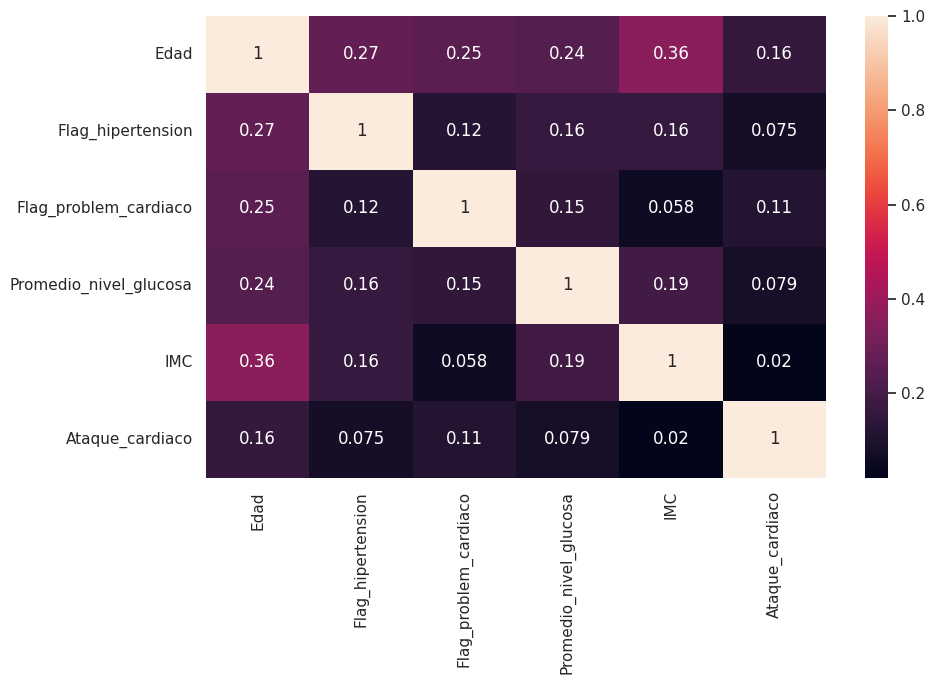

In [160]:
# Análisis Bivariado: Correlación.
corr = cora[['Edad', 'Flag_hipertension',	'Flag_problem_cardiaco', 'Promedio_nivel_glucosa', 'IMC', 'Ataque_cardiaco']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)

Interpretación Correlación:

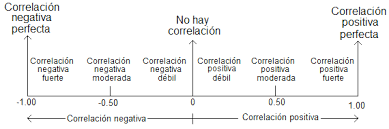

**Hallazgo:**

La variable que tiene mejor relación (aunque débil) con el Target "Ataque_cardiaco", es "Edad", la cual es positiva (0.16) . Esto quiere decir que a mayor edad, mayor riesgo de sufrir un ataque cardiaco. Seguidas y en orden descendente se encuentran las variables "Flag_problem_cardiaco", "Promedio_nivel_glucosa", "Flag_hipertension" e "IMC".


### *5.2.* Análisis de variables cualitativas

In [161]:
# Creación de un dataset para filtrar las variables categóricas.
categorical_attributes = cora.select_dtypes(include=['object'])

In [162]:
categorical_attributes.dtypes

,0
Genero,object
Estados_civil,object
Tipo_trabajo,object
Zona_residencia,object
Flag_fumador,object


<table>
  <tr>
    <th>Nombre de Campo</th>
    <th>Descripción</th>
    <th>Tipo de Variable</th>
    <th>Tipo de Dato</th>

  </tr>
  <tr>
    <td>ID</td>
    <td>Identificador del paciente</td>
    <td>string</td>
    <td></td>
  </tr>
  <tr>
    <td>Genero</td>
    <td>Si el cliente es hombre o mujer</td>
    <td>Categórico Nominal</td>
    <td>(Hombre, Mujer)</td>
  </tr>
  <tr>
    <td>Edad</td>
    <td>Edad del asegurado</td>
    <td>Discreto</td>
    <td></td>
  </tr>
  <tr>
    <td>Flag_hipertension</td>
    <td>Si el cliente padece de hipertensión o no</td>
    <td>Categórico nominal, Booleano</td>
    <td>(0, 1)</td>
  </tr>
  <tr>
    <td>Flag_problem_cardiaco</td>
    <td>Si el cliente padece de problemas cardiacos</td>
    <td>Categórico nominal, Booleano</td>
    <td>(0, 1)</td>
  </tr>
  <tr>
    <td>Estados_civil</td>
    <td>Si el asegurado está casado o no</td>
    <td>Categórico nominal, Booleano</td>
    <td>(Sí, No)</td>
  </tr>
  <tr>
    <td>Tipo_trabajo</td>
    <td>Actividad económica del cliente</td>
    <td>Categórico nominal</td>
    <td>(Cuidar niños, empresa privada, nunca trabajo, emprendedor, en gobierno, etc.)</td>
  </tr>
  <tr>
    <td>Zona_residencia</td>
    <td>Si el asegurado vive en zona rural o urbana</td>
    <td>Categórico nominal</td>
    <td>(Rural, Urbana)</td>
  </tr>
  <tr>
    <td>Promedio_nivel_glucosa</td>
    <td>Promedio de nivel de glucosa en la sangre del cliente</td>
    <td>Discreto</td>
    <td></td>
  </tr>
  <tr>
    <td>IMC</td>
    <td>Índice de Masa Corporal del asegurado</td>
    <td>Discreto</td>
    <td></td>
  </tr>
  <tr>
    <td>Flag_fumador</td>
    <td>Si el cliente es o ha sido fumador</td>
    <td>Categórico nominal</td>
    <td>(Nunca fuma, antes fumaba, fumador)</td>
  </tr>
  <tr>
    <td>Ataque_cardiaco</td>
    <td>Si el cliente sufrió de ataque cardiaco</td>
    <td>Categórico nominal, Booleano</td>
    <td>(0, 1)</td>
  </tr>
</table>

Se analiza cada variable categórica relacionándola con el Target, donde el objetivo es validar si el % de ataques cardiacos cambia de acuerdo con la categoría de cada variable.

In [163]:
# Análisis de la variable "Genero".
cora[['Genero', 'Ataque_cardiaco']].groupby(['Genero'], as_index=False).agg(['count','sum','mean'])

Genero Ataque_cardiaco               
                    count  sum      mean
0  Hombre           17724  352  0.019860
1   Mujer           25665  431  0.016793
2   Other              11    0  0.000000

**Hallazgo:**

La variable "Genero" sí discrimina el comportamiento del Target, debido a que la tasa de ataques cardiacos es 3 puntos porcentuales más alta en hombres (1.99%) que en mujeres (1.68%) y en otros es nula (0.0%). Además, la tasa en hombres es más alta que la general (1.8%) y en mujeres, menor.

In [164]:
# Análisis de la variable "Estados_civil".
cora[['Estados_civil', 'Ataque_cardiaco']].groupby(['Estados_civil'], as_index=False).agg(['count','sum','mean'])

Estados_civil Ataque_cardiaco               
                          count  sum      mean
0            No           15462   80  0.005174
1            Si           27938  703  0.025163

**Hallazgo:**

La variable "Estados_civil" sí discrimina el comportamiento del Target, debido a que la tasa de ataques cardiacos es más alta en personas casadas (2.52%) y mucho más alta que la tasa general (1.8%) que en personas que no están casadas (0.52%).

In [165]:
# Análisis de la variable "Tipo_trabajo".
cora[['Tipo_trabajo', 'Ataque_cardiaco']].groupby(['Tipo_trabajo'], as_index=False).agg(['count','sum','mean'])

Tipo_trabajo Ataque_cardiaco               
                             count  sum      mean
0      Emprendedor            6793  251  0.036950
1  Empresa_privada           24834  441  0.017758
2      En_gobierno            5440   89  0.016360
3    Nunca_trabajo             177    0  0.000000
4     cuidar_ninos            6156    2  0.000325

**Hallazgo:**

La variable "Tipo_trabajo" sí discrimina el comportamiento del Target, ya que la tasa de ataques cardiacos es más alta en personas emprendedoras (3.69%), seguida de colaboradores para empresas privadas (1.77%), de gobierno (1.64%), casi nula en personas que se dedican al cuidado de niños (0.03%) y nula en personas que no trabajan (0.0%). Se recuerda que la tasa general es de 1.8%.

In [166]:
# Análisis de la variable "Zona_residencia".
cora[['Zona_residencia', 'Ataque_cardiaco']].groupby(['Zona_residencia'], as_index=False).agg(['count','sum','mean'])

Zona_residencia Ataque_cardiaco               
                            count  sum      mean
0           Rural           21644  384  0.017742
1          Urbano           21756  399  0.018340

**Hallazgo:**

La variable "Zona_residencia" no discrimina el comportamiento del Target, ya que la tasa de ataques cardiacos es casi la misma en zonas urbanas (1.83%) que en zonas rurales (1.77%), ambas muy cercanas a la tasa general de 1.8%.

In [167]:
# Análisis de la variable "Flag_fumador".
cora[['Flag_fumador', 'Ataque_cardiaco']].groupby(['Flag_fumador'], as_index=False).agg(['count','sum','mean'])

Flag_fumador Ataque_cardiaco               
                          count  sum      mean
0    Nunca_fuma           16053  284  0.017691
1  antes_fumaba            7493  221  0.029494
2       fumador            6562  133  0.020268

**Hallazgo:**

La variable "Flag_fumador" sí discrimina el comportamiento del Target, ya que que la tasa de ataques cardiacos en personas que antes fumaban (2.95%) es mayor a aquella de los fumadores (2.03%) y de aquellas personas que nunca han fumado (1.77%).

De las 5 variables categóricas revisadas, se tomarán en consideración 4:
*  Genero
*  Estados_civil
*  Tipo_trabajo
*  Flag_fumador

##6. Tratamiento de datos

- Convertir variables categóricas a numéricas.
- Imputación de valores nulos.
- Reducción de la dimensionalidad (cantidad de categorías) en caso de ser necesario.
- Aplicar un cambio de distribución de las variables numéricas en caso de ser necesario para reducir los outliers extremos: Tope, Reescalamiento, Normalización, Estandarización estándar, Estandarización robusta.
- Seleccionar variables más importantes.

###6.1. Convertir variables categóricas a numéricas

Sugerencia: Se debe buscar reducir la cantidad de variables categóricas, es decir, poder agrupar categorías para que la variable cuente con una mejor distribución.

####6.1.1. Genero

In [168]:
# Visualización de los registros únicos.
cora['Genero'].unique()

array(['Hombre', 'Mujer', 'Other'], dtype=object)

In [169]:
cora['Genero_encoded']= cora['Genero'].map({'Hombre':0, 'Mujer':1, 'Other': 2})

####6.1.2. Estados_civil

In [170]:
cora['Estados_civil'].unique()

array(['No', 'Si'], dtype=object)

In [171]:
cora['Estados_civil_encoded']= cora['Estados_civil'].map({'No':0, 'Si':1})

####6.1.3. Tipo_trabajo

In [172]:
# Asignación de valores numéricos a cada categoría a través de otro método (LabelEncoder).
le = LabelEncoder()
cora['Tipo_trabajo'].unique()

array(['cuidar_ninos', 'Empresa_privada', 'Nunca_trabajo', 'Emprendedor',
       'En_gobierno'], dtype=object)

In [173]:
cora['Tipo_trabajo_encoded'] = le.fit_transform(cora['Tipo_trabajo'])

####6.1.4. Flag_fumador

In [174]:
cora['Flag_fumador'].unique()

array([nan, 'Nunca_fuma', 'antes_fumaba', 'fumador'], dtype=object)

In [175]:
cora['Flag_fumador_encoded'] = le.fit_transform(cora['Flag_fumador'])

###6.2. **Imputación de los valores nulos**

A continuación se llevará a cabo el tratamiento de los valores nulos, ya que en caso de que una variable requiera de normalización, esta no trabaja con valores nulos (NaN).

In [176]:
cora.isnull().sum()

,0
ID,0
Genero,0
Edad,0
Flag_hipertension,0
Flag_problem_cardiaco,0
Estados_civil,0
Tipo_trabajo,0
Zona_residencia,0
Promedio_nivel_glucosa,0
IMC,1462


###6.2.1. **Eliminación de los valores nulos para la variable "IMC"**

In [177]:
# Muestra de la forma antes de eliminar los nulos
print("Forma antes de eliminar los nulos:", cora.shape)

Forma antes de eliminar los nulos: (43400, 16)


In [178]:
# Eliminación de las filas nulas en la variable "IMC"
cora.dropna(subset=['IMC'], inplace=True)

In [179]:
# Muestra de la forma después de eliminar los nulos
print("Forma después de eliminar los nulos:", cora.shape)

Forma después de eliminar los nulos: (41938, 16)


###6.2.2. **Reemplazo de los valores nulos por el promedio para la variable "Flag_fumador_encoded"**

NOTA: Se realizará por mera práctica en la variable tratada "Flag_fumador_encoded", donde el código no trabajará dado que se trata de la copia de otra variable.

In [180]:
# Reemplazo de los valores nulos por el promedio para la variable "Flag_fumador_encoded"
cora['Flag_fumador_encoded'].fillna(cora['Flag_fumador_encoded'].mean(), inplace=True)

/tmp/ipython-input-303310611.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cora['Flag_fumador_encoded'].fillna(cora['Flag_fumador_encoded'].mean(), inplace=True)


###6.3. Reducción de la dimensionalidad (cantidad de categorías)

####6.3.1. Reducción de la dimensionalidad para la variable "Edad"

In [181]:
cora['Edad'].describe()

,Edad
count,41938.00000
mean,41.83929
std,22.48366
min,0.08000
25%,24.00000
50%,43.00000
75%,59.00000
max,82.00000


In [182]:
# Recategorización de la variable "Edad" en rangos de años con valores:
cora.loc[ cora['Edad'] <= 11, 'Edad_Encoded'] 					                         = 0 # Infante
cora.loc[(cora['Edad'] > 11) & (cora['Edad'] < 20), 'Edad_Encoded']              = 1 # Adolescente
cora.loc[(cora['Edad'] >= 20) & (cora['Edad'] < 40), 'Edad_Encoded']             = 2 # Adulto joven
cora.loc[(cora['Edad'] >= 40) & (cora['Edad'] < 65), 'Edad_Encoded']             = 3 # Adulto intermedio
cora.loc[ cora['Edad'] >= 65, 'Edad_Encoded']                                    = 4 # Adulto mayor

###6.4. Cambio de distribución en variables numéricas

####6.4.1. Topeo en la variable "Promedio_nivel_glucosa"

In [183]:
# Distribución de la variable por Deciles:
cora['Promedio_nivel_glucosa'].quantile(np.arange(0,1,0.1))

,Promedio_nivel_glucosa
0.0,55.000
0.1,65.990
0.2,74.154
0.3,80.160
0.4,85.370
0.5,91.320
0.6,97.910
0.7,105.900
0.8,119.100
0.9,174.053


* Los deciles hasta el 9 son aceptables, con un incremento entre 4 y 11 puntos de decil a decil. Sin embargo, del decil 9 (promedio de nivel de glucosa de 120.29) al decil 10 (promedio de nivel de glucosa de 180.952) es donde ya se encuentran los incrementos atípicos. Ahora se analizará entre el decil 9 y el valor máximo.



In [184]:
# Distribución de la variable por percentiles del P90 al valor máximo, se agrega más allá del 100 (1.01) para tener los datos completos.
cora['Promedio_nivel_glucosa'].quantile(np.arange(0.9,1.01,0.01))

,Promedio_nivel_glucosa
0.90,174.0530
0.91,184.3068
0.92,192.2216
0.93,198.9082
0.94,204.7800
0.95,210.3115
0.96,215.7152
0.97,221.4289
0.98,228.4052
0.99,238.1900


**Interpretación:**
* En el decil 9 el incremento entre centiles es entre 4 y 7 puntos hasta el centil 98.
* Del centil 98 al 99 hay un incremento de 10 puntos y del centil 99 al valor máximo, de 52, por lo que se tomará como referencia al centil 98 para reducir los valores extremos.

**Técnica para reducir los outliers extremos - Tope:**

Para reducir los valores extremos, se define el percentil 0.98 como nuevo valor máximo, reemplazando por el mismo a todos los valores que se encuentren en los percentiles superiores.

In [185]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.98))
    return(x)

In [186]:
glucosa_tope = cora[['Promedio_nivel_glucosa']].apply(lambda x: outlier_capping(x))

In [187]:
glucosa_tope.head()

,Promedio_nivel_glucosa
0,95.12
1,87.96
2,110.89
3,69.04
4,161.28


In [188]:
glucosa_tope.describe()

,Promedio_nivel_glucosa
count,41938.000000
mean,103.382970
std,41.420558
min,55.000000
25%,77.370000
50%,91.320000
75%,111.480000
max,228.405200


Se concatena el dataframe original (cora) con el nuevo dataframe (cora_tratamiento), al cual se le eliminaron los valores extremos pasando del percentil 0.98, por lo que se eliminarán de la base original para contar con el nuevo campo.

####6.4.2. Cambio de distribución de datos para la variable "IMC"

NOTA: En este numeral se realizarán, por mera práctica, los ejercicios de reescalamiento, normalización, estandarización estándar y estandarización robusta; sin embargo, no se aplicarán en la solución al proyecto.

####6.4.2.1. Reescalamiento a la variable "IMC"

In [189]:
min_max_scaler = MinMaxScaler()
cora['IMC_scaled'] = min_max_scaler.fit_transform(cora[['IMC']])

In [190]:
display(cora[['IMC', 'IMC_scaled']].head())

,IMC,IMC_scaled
0,18.0,0.090286
1,39.2,0.332571
2,17.6,0.085714
3,35.9,0.294857
4,19.1,0.102857


In [191]:
display(cora[['IMC', 'IMC_scaled']].describe())

,IMC,IMC_scaled
count,41938.000000,41938.000000
mean,28.605038,0.211486
std,7.770020,0.088800
min,10.100000,0.000000
25%,23.200000,0.149714
50%,27.700000,0.201143
75%,32.900000,0.260571
max,97.600000,1.000000


####6.4.2.2. Normalización a la variable "IMC"

In [192]:
normalizer = Normalizer()
cora['IMC_normalized'] = normalizer.fit_transform(cora[['IMC']])

In [193]:
display(cora[['IMC', 'IMC_normalized']].head())

,IMC,IMC_normalized
0,18.0,1.0
1,39.2,1.0
2,17.6,1.0
3,35.9,1.0
4,19.1,1.0


In [194]:
display(cora[['IMC', 'IMC_normalized']].describe())

,IMC,IMC_normalized
count,41938.000000,41938.0
mean,28.605038,1.0
std,7.770020,0.0
min,10.100000,1.0
25%,23.200000,1.0
50%,27.700000,1.0
75%,32.900000,1.0
max,97.600000,1.0


####6.4.2.3. Estandarización estándar para la variable "IMC"

In [195]:
standard_scaler = StandardScaler()
cora['IMC_estandar'] = standard_scaler.fit_transform(cora[['IMC']])

In [196]:
display(cora[['IMC', 'IMC_estandar']].head())

,IMC,IMC_estandar
0,18.0,-1.364882
1,39.2,1.363586
2,17.6,-1.416363
3,35.9,0.938871
4,19.1,-1.223311


In [197]:
display(cora[['IMC', 'IMC_estandar']].describe())

,IMC,IMC_estandar
count,41938.000000,4.193800e+04
mean,28.605038,-4.989624e-16
std,7.770020,1.000012e+00
min,10.100000,-2.381623e+00
25%,23.200000,-6.956356e-01
50%,27.700000,-1.164796e-01
75%,32.900000,5.527672e-01
max,97.600000,8.879743e+00


####6.4.2.4. Estandarización robusta para la variable "IMC"

In [198]:
robust_scaler = RobustScaler()
cora['IMC_robusto'] = robust_scaler.fit_transform(cora[['IMC']])

In [199]:
display(cora[['IMC', 'IMC_robusto']].head())

,IMC,IMC_robusto
0,18.0,-1.000000
1,39.2,1.185567
2,17.6,-1.041237
3,35.9,0.845361
4,19.1,-0.886598


In [200]:
display(cora[['IMC', 'IMC_robusto']].describe())

,IMC,IMC_robusto
count,41938.000000,41938.000000
mean,28.605038,0.093303
std,7.770020,0.801033
min,10.100000,-1.814433
25%,23.200000,-0.463918
50%,27.700000,0.000000
75%,32.900000,0.536082
max,97.600000,7.206186


###6.5. Consolidación y generación del dataset final

In [201]:
cora.head()

,ID,Genero,Edad,Flag_hipertension,Flag_problem_cardiaco,Estados_civil,Tipo_trabajo,Zona_residencia,Promedio_nivel_glucosa,IMC,...,Ataque_cardiaco,Genero_encoded,Estados_civil_encoded,Tipo_trabajo_encoded,Flag_fumador_encoded,Edad_Encoded,IMC_scaled,IMC_normalized,IMC_estandar,IMC_robusto
0,30669,Hombre,3.0,0,0,No,cuidar_ninos,Rural,95.12,18.0,...,0,0,0,4,3,0.0,0.090286,1.0,-1.364882,-1.000000
1,30468,Hombre,58.0,1,0,Si,Empresa_privada,Urbano,87.96,39.2,...,0,0,1,1,0,3.0,0.332571,1.0,1.363586,1.185567
2,16523,Mujer,8.0,0,0,No,Empresa_privada,Urbano,110.89,17.6,...,0,1,0,1,3,0.0,0.085714,1.0,-1.416363,-1.041237
3,56543,Mujer,70.0,0,0,Si,Empresa_privada,Rural,69.04,35.9,...,0,1,1,1,1,4.0,0.294857,1.0,0.938871,0.845361
4,46136,Hombre,14.0,0,0,No,Nunca_trabajo,Rural,161.28,19.1,...,0,0,0,3,3,1.0,0.102857,1.0,-1.223311,-0.886598


In [202]:
cora.columns

Index(['ID', 'Genero', 'Edad', 'Flag_hipertension', 'Flag_problem_cardiaco',
       'Estados_civil', 'Tipo_trabajo', 'Zona_residencia',
       'Promedio_nivel_glucosa', 'IMC', 'Flag_fumador', 'Ataque_cardiaco',
       'Genero_encoded', 'Estados_civil_encoded', 'Tipo_trabajo_encoded',
       'Flag_fumador_encoded', 'Edad_Encoded', 'IMC_scaled', 'IMC_normalized',
       'IMC_estandar', 'IMC_robusto'],
      dtype='object')

In [203]:
# Creación de lista con todas las variables a eliminar.
drop_elements = ['ID', 'Genero', 'Edad', 'Estados_civil', 'Tipo_trabajo', 'Zona_residencia', 'Flag_fumador', 'IMC_scaled', 'IMC_normalized', 'IMC_estandar', 'IMC_robusto']

In [204]:
cora_encoded = cora.drop(drop_elements, axis = 1)

In [205]:
# Dataset final
cora_encoded.head(7)

,Flag_hipertension,Flag_problem_cardiaco,Promedio_nivel_glucosa,IMC,Ataque_cardiaco,Genero_encoded,Estados_civil_encoded,Tipo_trabajo_encoded,Flag_fumador_encoded,Edad_Encoded
0,0,0,95.12,18.0,0,0,0,4,3,0.0
1,1,0,87.96,39.2,0,0,1,1,0,3.0
2,0,0,110.89,17.6,0,1,0,1,3,0.0
3,0,0,69.04,35.9,0,1,1,1,1,4.0
4,0,0,161.28,19.1,0,0,0,3,3,1.0
5,0,0,210.95,50.1,0,1,1,1,3,3.0
6,0,0,77.59,17.7,0,1,1,1,1,3.0


Otras acciones que se puedan presentar en el tratamiento de datos:

*   Topear los valores extremos de variables numéricas
*   Normalizar/estandarizar variables numéricas
*   Imputar valores nulos en variables categóricas
*   Otras





##7. Selección de variables

<Axes: >

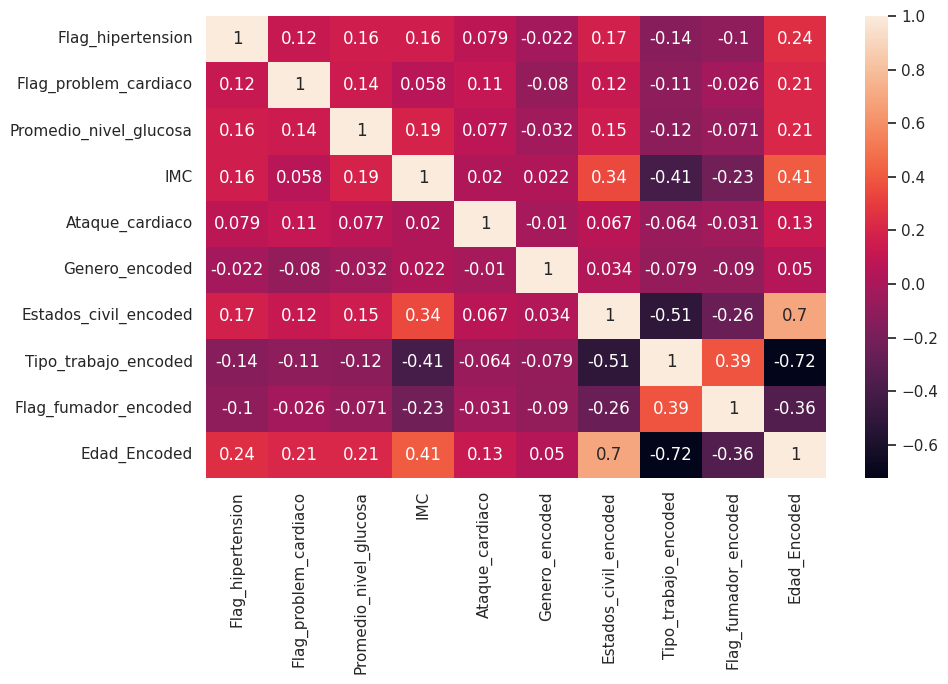

In [206]:
# Cálculo de la correlación
corr = cora_encoded.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)

In [207]:
# Cálculo de la comparación de correlación vs Target
corr_medv = corr['Ataque_cardiaco'].reindex(corr['Ataque_cardiaco'].abs().sort_values(ascending=False).index)
print(corr_medv)

Ataque_cardiaco           1.000000
Edad_Encoded              0.126754
Flag_problem_cardiaco     0.111102
Flag_hipertension         0.079479
Promedio_nivel_glucosa    0.077227
Estados_civil_encoded     0.066794
Tipo_trabajo_encoded     -0.063739
Flag_fumador_encoded     -0.031059
IMC                       0.020285
Genero_encoded           -0.010144
Name: Ataque_cardiaco, dtype: float64


In [208]:
# Selección de variables
from sklearn.feature_selection import SelectKBest

X=cora_encoded.drop(['Ataque_cardiaco'], axis=1) # Variables independientes
y=cora_encoded['Ataque_cardiaco']                # Variable dependiente

best=SelectKBest(k=8)                            # Selección de las 8 mejores variables independientes de las 9 disponibles
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Flag_hipertension', 'Flag_problem_cardiaco', 'Promedio_nivel_glucosa',
       'IMC', 'Estados_civil_encoded', 'Tipo_trabajo_encoded',
       'Flag_fumador_encoded', 'Edad_Encoded'],
      dtype='object')


##8. Balanceo de datos

###8.1 Separación Train/Test

In [209]:
# Se seleccionará un 30% de los datos para estudiar el beneficio de las estrategias de muestreo
# Variables independientes (las seleccionadas en el numeral anterior):
X = cora_encoded[['Flag_hipertension', 'Flag_problem_cardiaco', 'Promedio_nivel_glucosa',
       'IMC', 'Estados_civil_encoded', 'Tipo_trabajo_encoded',
       'Flag_fumador_encoded', 'Edad_Encoded']]
# Variable dependiente:
y = cora_encoded[['Ataque_cardiaco']]

import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.70,test_size=0.30, random_state=1206)

In [210]:
# Sólo se utilizarán datos de entrenamiento para la estrategia:
df_train = pd.concat([X_train,y_train],axis=1)

In [211]:
count_class_0, count_class_1 = df_train.Ataque_cardiaco.value_counts()

# División por clases
df_class_0 = df_train[df_train['Ataque_cardiaco'] == 0]
df_class_1 = df_train[df_train['Ataque_cardiaco'] == 1]

In [212]:
count_class_0, len(df_class_0), count_class_1, len(df_class_1)

(28899, 28899, 457, 457)

In [213]:
# Total de registros del Train:
28899+457

29356

In [214]:
# Participación del Target para validar si es similar al % total (1.8%):
457/29356

0.015567516010355635

###8.2 Undersampling (se reduce la categoría mayoritaria al tamaño de la categoría minoritaria)

In [215]:
df_class_0_under = df_class_0.sample(count_class_1,random_state=1206)

In [216]:
df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)

Estrategia de Muestreo under-sampling:
Ataque_cardiaco
0    457
1    457
Name: count, dtype: int64


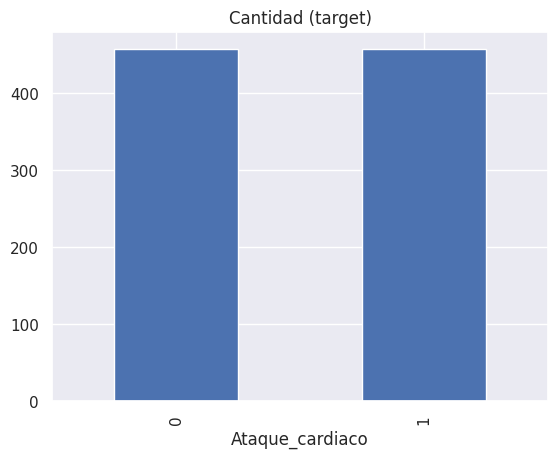

In [217]:
print('Estrategia de Muestreo under-sampling:')
print(df_train_under.Ataque_cardiaco.value_counts())

df_train_under.Ataque_cardiaco.value_counts().plot(kind='bar', title='Cantidad (target)');

###8.2 Oversampling (se replica la categoría minoritaria al tamaño de la categoría mayoritaria)

In [218]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)

In [219]:
df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

Estrategia de Muestreo over-sampling:
Ataque_cardiaco
0    28899
1    28899
Name: count, dtype: int64


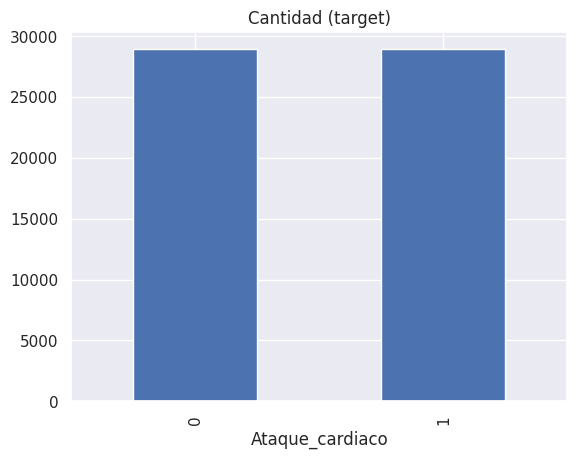

In [220]:
print('Estrategia de Muestreo over-sampling:')
print(df_train_over.Ataque_cardiaco.value_counts())

df_train_over.Ataque_cardiaco.value_counts().plot(kind='bar', title='Cantidad (target)');

###8.3 Resumen de las fuentes de Train

In [221]:
# Train Original
df_train.Ataque_cardiaco.value_counts()

,count
Ataque_cardiaco,
0,28899
1,457


In [222]:
# Train Undersampling
df_train_under.Ataque_cardiaco.value_counts()

,count
Ataque_cardiaco,
0,457
1,457


In [223]:
#Train Oversampling
df_train_over.Ataque_cardiaco.value_counts()

,count
Ataque_cardiaco,
0,28899
1,28899


###8.4 Evaluación del Balanceo

####8.4.1 Train Original

In [224]:
# Importación de librerías
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss

# Declaración del modelo
model = DecisionTreeClassifier()

# Entrenamiento del modelo
model.fit(X_train, y_train)

# Predicción del modelo
y_pred_1 = model.predict(X_test)

####8.4.2 Undersampling

In [225]:
# Declaración del modelo
model = DecisionTreeClassifier()

# Definición de la base de Train
X_train_u= df_train_under[['Flag_hipertension', 'Flag_problem_cardiaco', 'Promedio_nivel_glucosa',
       'IMC', 'Estados_civil_encoded', 'Tipo_trabajo_encoded',
       'Flag_fumador_encoded', 'Edad_Encoded']]
y_train_u = df_train_under[['Ataque_cardiaco']]

# Entrenamiento del modelo
model.fit(X_train_u, y_train_u)

# Predicción del modelo
y_pred_2 = model.predict(X_test)

####8.4.3 Oversampling

In [226]:
# Declaración del modelo
model = DecisionTreeClassifier()

# Definición de la base de Train
X_train_o= df_train_over[['Flag_hipertension', 'Flag_problem_cardiaco', 'Promedio_nivel_glucosa',
       'IMC', 'Estados_civil_encoded', 'Tipo_trabajo_encoded',
       'Flag_fumador_encoded', 'Edad_Encoded']]
y_train_o = df_train_over[['Ataque_cardiaco']]

# Entrenamiento del modelo
model.fit(X_train_o, y_train_o)

# Predicción del modelo
y_pred_3 = model.predict(X_test)

####8.4.4 Matriz de confusión

In [227]:
# Original
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_1)

array([[12190,   206],
       [  175,    11]])

In [228]:
# Undersampling
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_2)

array([[8838, 3558],
       [  78,  108]])

In [229]:
# Oversampling
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_3)

array([[12257,   139],
       [  178,     8]])

####8.4.5 Métricas

In [230]:
from sklearn.metrics import classification_report

In [231]:
# Original Categoría 1: Precision 0.03 Recall 0.04
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     12396
           1       0.05      0.06      0.05       186

    accuracy                           0.97     12582
   macro avg       0.52      0.52      0.52     12582
weighted avg       0.97      0.97      0.97     12582



In [232]:
# Undersampling Categoría 1: Precision 0.03 Recall 0.60
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.99      0.71      0.83     12396
           1       0.03      0.58      0.06       186

    accuracy                           0.71     12582
   macro avg       0.51      0.65      0.44     12582
weighted avg       0.98      0.71      0.82     12582



In [233]:
# Oversampling Categoría 1: Precision 0.03 Recall 0.03
print(classification_report(y_test,y_pred_3))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12396
           1       0.05      0.04      0.05       186

    accuracy                           0.97     12582
   macro avg       0.52      0.52      0.52     12582
weighted avg       0.97      0.97      0.97     12582



Se tomará en consideración el modelo con balanceo de datos **undersampling**, dado que es el que presenta una mejor métrica:

**- Categoría 1: Precisión de 3% y Cobertura de 60%**

- Peso promedio: Precisión de 98% y Cobertura de 71%

In [234]:
import xgboost as xgb

Se elige el Train original.

##9. Modelado

In [235]:
!pip install xgboost

In [236]:
import xgboost as xgb

In [237]:
# XGBoost Sin Tunear

# Declaración del modelo
model1 = xgb.XGBClassifier()

#Entrenamiento del modelo
model1.fit(X_train_u, y_train_u)

# Predicción del modelo
pred_1 = model1.predict(X_test)

In [238]:
# XGBoost Tuneado (cuando se registran parámetros propios)

# Declaración del modelo
model2 = xgb.XGBClassifier(n_estimators = 20, max_depth = 8, learning_rate = 0.1, subsample = 0.5)

# Entrenamiento del modelo

model2.fit(X_train_u, y_train_u)

# Predicción del modelo
pred_2 = model2.predict(X_test)

In [239]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Declaración del modelo
model3 = RandomForestClassifier()

#Entrenamiento del modelo
model3.fit(X_train_u, y_train_u)

#Predicción del modelo
pred_3 = model3.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [240]:
# Random Forest Tuneado

from sklearn.ensemble import RandomForestClassifier

# Declaración del modelo
model4 = RandomForestClassifier(n_estimators = 20, max_depth = 8)

# Entrenamiento del modelo
model4.fit(X_train_u, y_train_u)

# Predicción del modelo
pred_4 = model4.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


##10. Evaluación

In [241]:
# XGBoost Categoría 1: Precision 0.03 Recall 0.68
print(classification_report(y_test,pred_1))

              precision    recall  f1-score   support

           0       0.99      0.71      0.83     12396
           1       0.03      0.68      0.06       186

    accuracy                           0.71     12582
   macro avg       0.51      0.70      0.45     12582
weighted avg       0.98      0.71      0.82     12582



In [242]:
# XGBoost Tuneado Categoría 1: Precision 0.04 Recall 0.78
print(classification_report(y_test,pred_2))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84     12396
           1       0.04      0.78      0.08       186

    accuracy                           0.73     12582
   macro avg       0.52      0.76      0.46     12582
weighted avg       0.98      0.73      0.83     12582



In [243]:
# RF Categoría 1: Precision 0.04 Recall 0.71
print(classification_report(y_test,pred_3))

              precision    recall  f1-score   support

           0       0.99      0.72      0.84     12396
           1       0.04      0.70      0.07       186

    accuracy                           0.72     12582
   macro avg       0.52      0.71      0.45     12582
weighted avg       0.98      0.72      0.83     12582



In [244]:
# RF Tuneado Categoría 1: Precision 0.04 Recall 0.76
print(classification_report(y_test,pred_4))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85     12396
           1       0.04      0.75      0.08       186

    accuracy                           0.74     12582
   macro avg       0.52      0.74      0.46     12582
weighted avg       0.98      0.74      0.83     12582



Se selecciona el XGBoost Tuneado, dado que es el modelado con precisión (4%) y cobertura (78%) más altas para la Categoría 1.

##11. Implementación

In [245]:
df_new = pd.read_csv('DS_train_enf_corazon_new.csv', sep=";")

In [246]:
df_new.shape

(430, 12)

In [247]:
df_new.head()

,ID,Genero,Edad,Flag_hipertension,Flag_problem_cardiaco,Estados_civil,Tipo_trabajo,Zona_residencia,Promedio_nivel_glucosa,IMC,Flag_fumador,Unnamed: 11
0,30669,Hombre,3.0,0,0,No,cuidar_ninos,Rural,95.12,18.0,NaN,NaN
1,30468,Hombre,58.0,1,0,Si,Empresa_privada,Urbano,87.96,39.2,Nunca_fuma,NaN
2,16523,Mujer,8.0,0,0,No,Empresa_privada,Urbano,110.89,17.6,NaN,NaN
3,56543,Mujer,70.0,0,0,Si,Empresa_privada,Rural,69.04,35.9,antes_fumaba,NaN
4,46136,Hombre,14.0,0,0,No,Nunca_trabajo,Rural,161.28,19.1,NaN,NaN


Para la nueva base de datos se desean estimar los comportamientos futuros (posibles ataques al corazón), se debe tener la misma estructura final que se utilizó en el modelo, por lo que se realiza el tratamiento de datos a las variables necesarias:

In [248]:
# Completar el tratamiento de datos
df_new['Genero_encoded'] = df_new['Genero'].map({'Hombre':0, 'Mujer':1, 'Other': 2})
df_new['Estados_civil_encoded']= df_new['Estados_civil'].map({'No':0, 'Si':1})
df_new['Tipo_trabajo_encoded'] = le.fit_transform(df_new['Tipo_trabajo'])
df_new['Flag_fumador_encoded'] = le.fit_transform(df_new['Flag_fumador'].astype(str))    # Conversión a categórica para tratamiento de datos nulos

In [249]:
# Eliminación de los valores nulos para la variable "IMC"y sustitución de valores nulos por el promedio para la variable "Flag_fumador_encoded"
df_new.dropna(subset=['IMC'], inplace=True)
df_new['Flag_fumador_encoded'] = df_new['Flag_fumador_encoded'].fillna(df_new['Flag_fumador_encoded'].mean())

In [250]:
# Reducción de la dimensionalidad para la variable "Edad"
df_new.loc[ df_new['Edad'] <= 11, 'Edad_Encoded'] = 0                          # Infante
df_new.loc[(df_new['Edad'] > 11) & (df_new['Edad'] < 20), 'Edad_Encoded'] = 1  # Adolescente
df_new.loc[(df_new['Edad'] >= 20) & (df_new['Edad'] < 40), 'Edad_Encoded'] = 2 # Adulto joven
df_new.loc[(df_new['Edad'] >= 40) & (df_new['Edad'] < 65), 'Edad_Encoded'] = 3 # Adulto intermedio
df_new.loc[ df_new['Edad'] >= 65, 'Edad_Encoded'] = 4                          # Adulto mayor

In [251]:
# Topeo en la variable "Promedio_nivel_glucosa"
df_new['Promedio_nivel_glucosa'] = outlier_capping(df_new['Promedio_nivel_glucosa'])

In [252]:
# Selección de variables
X_new_implementation = df_new[['Flag_hipertension', 'Flag_problem_cardiaco', 'Promedio_nivel_glucosa',
       'IMC', 'Estados_civil_encoded', 'Tipo_trabajo_encoded',
       'Flag_fumador_encoded', 'Edad_Encoded']]

In [253]:
# Completar las variables restantes
pred = model2.predict(X_new_implementation)

In [254]:
df_new['Ataque_cardiaco'] = pred

In [256]:
df_new.head(20)

,ID,Genero,Edad,Flag_hipertension,Flag_problem_cardiaco,Estados_civil,Tipo_trabajo,Zona_residencia,Promedio_nivel_glucosa,IMC,Flag_fumador,Unnamed: 11,Genero_encoded,Estados_civil_encoded,Tipo_trabajo_encoded,Flag_fumador_encoded,Edad_Encoded,Ataque_cardiaco
0,30669,Hombre,3.0,0,0,No,cuidar_ninos,Rural,95.120,18.0,NaN,NaN,0,0,4,3,0.0,0
1,30468,Hombre,58.0,1,0,Si,Empresa_privada,Urbano,87.960,39.2,Nunca_fuma,NaN,0,1,1,0,3.0,0
2,16523,Mujer,8.0,0,0,No,Empresa_privada,Urbano,110.890,17.6,NaN,NaN,1,0,1,3,0.0,0
3,56543,Mujer,70.0,0,0,Si,Empresa_privada,Rural,69.040,35.9,antes_fumaba,NaN,1,1,1,1,4.0,1
4,46136,Hombre,14.0,0,0,No,Nunca_trabajo,Rural,161.280,19.1,NaN,NaN,0,0,3,3,1.0,0
5,32257,Mujer,47.0,0,0,Si,Empresa_privada,Urbano,210.950,50.1,NaN,NaN,1,1,1,3,3.0,1
6,52800,Mujer,52.0,0,0,Si,Empresa_privada,Urbano,77.590,17.7,antes_fumaba,NaN,1,1,1,1,3.0,0
7,41413,Mujer,75.0,0,1,Si,Emprendedor,Rural,232.716,27.0,Nunca_fuma,NaN,1,1,0,0,4.0,1
8,15266,Mujer,32.0,0,0,Si,Empresa_privada,Rural,77.670,32.3,fumador,NaN,1,1,1,2,2.0,0
9,28674,Mujer,74.0,1,0,Si,Emprendedor,Urbano,205.840,54.6,Nunca_fuma,NaN,1,1,0,0,4.0,1
